In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticks
import datetime as dt

In [2]:
# Load in the Zillow Home Value Index dataframe.
url="https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv"
dff = pd.read_csv(url,low_memory=False)
dff

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22462,236350,28439,Palisades,city,TX,TX,"Amarillo, TX",Randall County,NaN,NaN,...,198490.0,198467.0,196420.0,192002.0,191634.0,189383.0,191134.0,191343.0,192384.0,192110.0
22463,40403,28439,Port Mansfield,city,TX,TX,"Raymondville, TX",Willacy County,NaN,NaN,...,229251.0,232984.0,238245.0,240154.0,242470.0,243119.0,249098.0,255572.0,261910.0,264685.0
22464,54740,28439,Tribes Hill,city,NY,NY,"Amsterdam, NY",Montgomery County,53380.0,53662.0,...,132490.0,134951.0,137470.0,137430.0,137413.0,137615.0,138908.0,140096.0,141573.0,142438.0
22465,249186,28439,Derby Center,city,VT,VT,NaN,Orleans County,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,258191.0,261607.0,264571.0,266255.0


In [3]:
# Filter the 4 largest cities into a new dataframe.
filter_city=(dff["SizeRank"]==0)|(dff["SizeRank"]==1)|(dff["SizeRank"]==2)|(dff["SizeRank"]==3)
df=dff[filter_city].copy()
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [4]:
#Melt the data to long-form and prepare it for time series analysis
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName', '2000-01-31', '2000-02-29',
       ...
       '2021-12-31', '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
       '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30'],
      dtype='object', length=281)

In [5]:
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'], var_name="Date", value_name='ZHVI')
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,ZHVI
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0
...,...,...,...,...,...,...,...,...,...,...
1087,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2022-08-31,315587.0
1088,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2022-09-30,781622.0
1089,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2022-09-30,966595.0
1090,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2022-09-30,272639.0


In [6]:
melted['Date'] = pd.to_datetime(melted['Date'])
# Make the datetime column the index.
melted = melted.set_index("Date")
melted.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2000-01-31 to 2022-09-30
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   ZHVI        1087 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 85.3+ KB


In [7]:
#Resample the dataframe as monthly frequency, grouped by City
df_ts = melted.groupby('RegionName').resample('M').last(numeric_only=True)
df_ts = df_ts.drop(['RegionID', 'SizeRank'],axis=1)
df_ts 

ZHVI
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

In [8]:
unstacked = df_ts.unstack(level=0)
unstacked

ZHVI                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

In [9]:
def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000_000
    return f"{new_x:,.0f}M"
def thousands(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    new_x = x/1_000
    return f"{new_x:,.0f}K"
# Create the formatters
fmt_mill = mticks.FuncFormatter(millions)
fmt_thous = mticks.FuncFormatter(thousands)

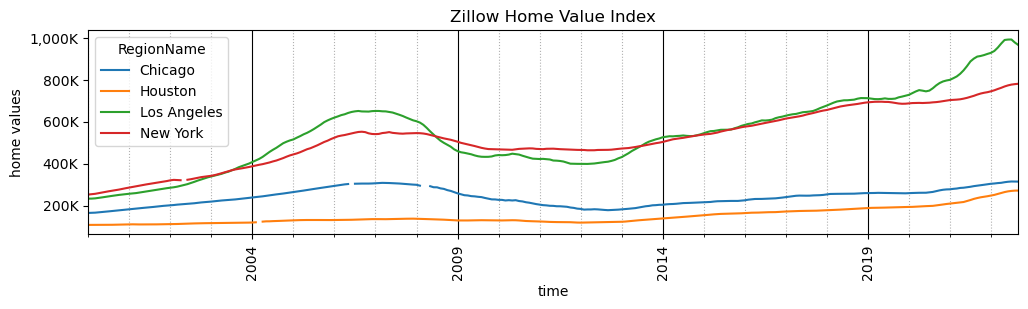

In [10]:
# Plot the home values for all 4 cities. 
fig, ax = plt.subplots(figsize=(12,3))
## creating our tick locators and formattersloc_month = mdates.MonthLocator(3)
loc_yearr = mdates.YearLocator(5)
fmt_yearr = mdates.DateFormatter("%Y")
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")
## customize minor ticks
ax.xaxis.set_minor_locator(loc_year)
ax.xaxis.set_minor_formatter(fmt_year)
## customize major ticks
ax.xaxis.set_major_locator(loc_yearr)
ax.xaxis.set_major_formatter(fmt_yearr)
unstacked['ZHVI'].plot(ax=ax, title='Zillow Home Value Index',ylabel='home values',xlabel='time')
ax.yaxis.set_major_formatter(fmt_thous)
## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='black')
fig.autofmt_xdate(rotation=90,ha='center');

1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?>>>>New York had the highest (510309.0), Houston had the least (131283.0)

In [11]:
df_ts.loc[pd.IndexSlice[:, '2008'],:]

ZHVI
RegionName  Date                
Chicago     2008-01-31  300207.0
            2008-02-29  296063.0
            2008-03-31       NaN
            2008-04-30       NaN
            2008-05-31  293467.0
            2008-06-30  288495.0
            2008-07-31  288174.0
            2008-08-31  283199.0
            2008-09-30  280695.0
            2008-10-31  274849.0
            2008-11-30  271059.0
            2008-12-31  265306.0
Houston     2008-01-31  138208.0
            2008-02-29  137512.0
            2008-03-31  136795.0
            2008-04-30  136628.0
            2008-05-31  136228.0
            2008-06-30  135773.0
            2008-07-31  135392.0
            2008-08-31  134770.0
            2008-09-30  133932.0
            2008-10-31  133189.0
            2008-11-30  132247.0
            2008-12-31  131283.0
Los Angeles 2008-01-31  603029.0
            2008-02-29  596635.0
            2008-03-31  586065.0
            2008-04-30  571226.0
            2008-05-31  554589.0
            2008-06-30  539622.0
            2008-07-31  524220.0
            2008-08-31  510520.0
            2008-09-30  500124.0
            2008-10-31  490979.0
            2008-11-30  481905.0
            2008-12-31  469294.0
New York    2008-01-31  546538.0
            2008-02-29  546098.0
            2008-03-31  544562.0
            2008-04-30  541865.0
            2008-05-31  537685.0
            2008-06-30  533810.0
            2008-07-31  529211.0
            2008-08-31  525290.0
            2008-09-30  521347.0
            2008-10-31  518048.0
            2008-11-30  514767.0
            2008-12-31  510309.0

2) How much did the home values change from November 2008 to December 2008 (in dollars)?>>>>-5753.0	for Chicago, -964.0	for Houston, -12611.0 for Los Angeles, -4458.0 for New York

In [12]:
unstacked.diff().loc['2008',:]

ZHVI                             
RegionName Chicago Houston Los Angeles New York
Date                                           
2008-01-31  -928.0  -594.0     -4357.0    285.0
2008-02-29 -4144.0  -696.0     -6394.0   -440.0
2008-03-31     NaN  -717.0    -10570.0  -1536.0
2008-04-30     NaN  -167.0    -14839.0  -2697.0
2008-05-31     NaN  -400.0    -16637.0  -4180.0
2008-06-30 -4972.0  -455.0    -14967.0  -3875.0
2008-07-31  -321.0  -381.0    -15402.0  -4599.0
2008-08-31 -4975.0  -622.0    -13700.0  -3921.0
2008-09-30 -2504.0  -838.0    -10396.0  -3943.0
2008-10-31 -5846.0  -743.0     -9145.0  -3299.0
2008-11-30 -3790.0  -942.0     -9074.0  -3281.0
2008-12-31 -5753.0  -964.0    -12611.0  -4458.0

## Your overall goal is to forecast the home values for the city with the highest home value in 2008(New York) 6months into the future (beyond the dataset).

- Filter the dataset only to include values starting in 2018
- Check for and address null values.
- Decompose the Time series to detect seasonality and decide if your model should or should not have a seasonal component

In [49]:
ts_NY = unstacked.loc['2018':,('ZHVI', 'New York')]
ts_NY

Date
2018-01-31    656700.0
2018-02-28    661012.0
2018-03-31    665672.0
2018-04-30    669989.0
2018-05-31    673514.0
2018-06-30    676434.0
2018-07-31    678984.0
2018-08-31    681140.0
2018-09-30    683546.0
2018-10-31    685588.0
2018-11-30    688553.0
2018-12-31    691226.0
2019-01-31    693208.0
2019-02-28    694425.0
2019-03-31    695720.0
2019-04-30    695824.0
2019-05-31    696173.0
2019-06-30    695186.0
2019-07-31    695010.0
2019-08-31    692926.0
2019-09-30    690189.0
2019-10-31    687693.0
2019-11-30    686304.0
2019-12-31    686650.0
2020-01-31    688073.0
2020-02-29    689697.0
2020-03-31    690055.0
2020-04-30    690520.0
2020-05-31    689921.0
2020-06-30    690785.0
2020-07-31    691384.0
2020-08-31    693097.0
2020-09-30    694261.0
2020-10-31    696260.0
2020-11-30    698929.0
2020-12-31    701899.0
2021-01-31    703956.0
2021-02-28    705003.0
2021-03-31    706066.0
2021-04-30    707633.0
2021-05-31    710706.0
2021-06-30    714507.0
2021-07-31    719155.0
2021-0

In [50]:
ts_NY.isna().sum()

0

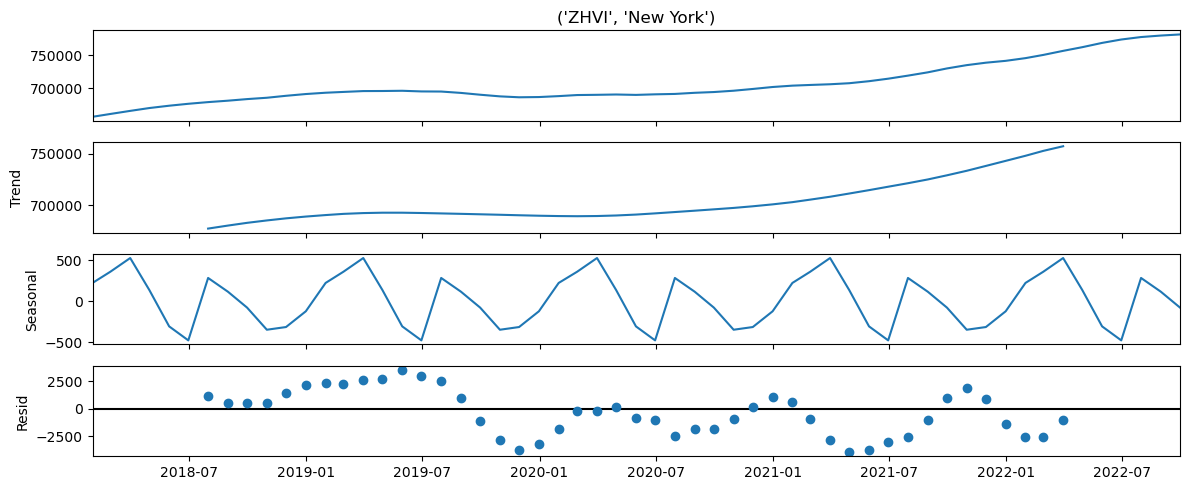

In [51]:
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs
# We see a repeating pattern that is likely seasonal
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts_NY)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()


In [53]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta} which is ~{seasonal_delta/(ts_NY.max()-ts_NY.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is 1006.1319444444575 which is ~0.81% of the variation in time series.


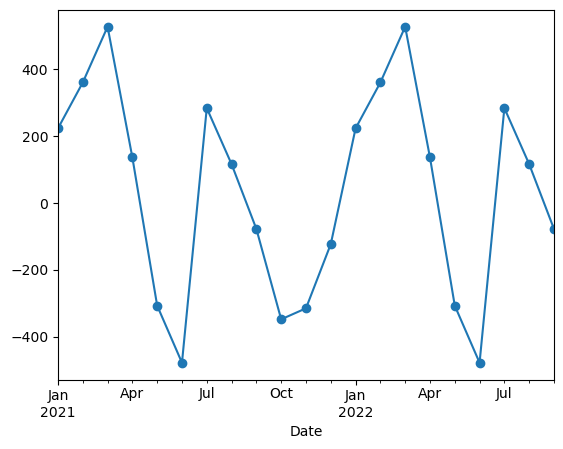

In [54]:
# Narrow down the date range of the plot
seasonal = decomp.seasonal
ax = seasonal.loc['2021':].plot(marker = 'o')

[!] There are 12 points between peaks, indicating a seasonal period of 12 months. 

- Determine Time Series Model Orders
- Split the time series into training and test data (Remember we want to predict 6 months, and our data has been resampled to monthly)

In [57]:
# determine d
d = ndiffs(ts_NY)
print (f'd = {d}')

# Determine D
D = nsdiffs(ts_NY, m =12)
print(f'D = {D}')

d = 2
D = 0


In [65]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)
    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

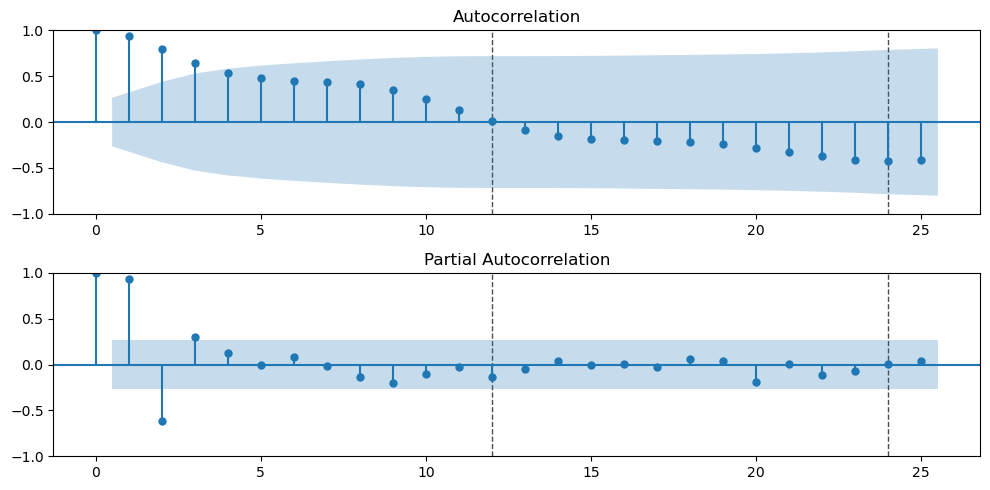

In [72]:
# ​# apply the nonseasonal differencing.
ts_diff = ts_NY.diff(2).dropna()
# We can use our function to highlight the seasonal lags by adding the arguments
plot_acf_pacf(ts_diff, annotate_seas=True, m = 12, nlags=25);

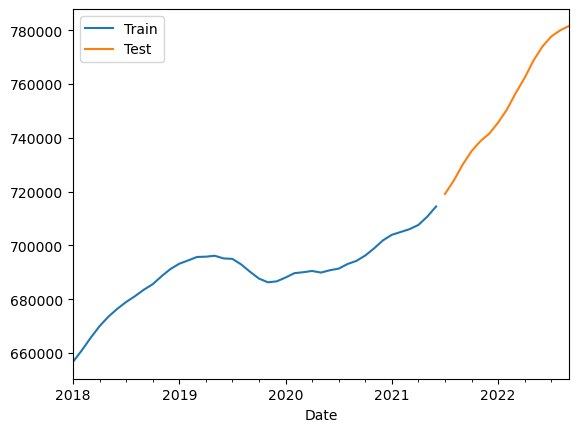

In [74]:
train, test = train_test_split(ts_NY, test_size=.25)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

Both the ACF and PACF gradually decrease in magnitude, so we will start with an AR1 MA1. 
The seasonal lags, we will start with an SMA1. 
- Fit a manual ARIMA/SARIMA model based on the orders determined during your exploration.

In [87]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()
# Obtain summary
sarima.summary()

C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                     
========================================================================================
Dep. Variable:             ('ZHVI', 'New York')   No. Observations:                   42
Model:             ARIMA(1, 2, 1)x(0, 0, 1, 12)   Log Likelihood                -327.114
Date:                          Fri, 27 Oct 2023   AIC                            662.228
Time:                                  16:27:29   BIC                            668.983
Sample:                              01-31-2018   HQIC                           664.670
                                   - 06-30-2021                                         
Covariance Type:                            opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0008      5.818     -0.000      1.000     -11.405      11.403
ma.L1         -0.0008      5.820     -0.000      1.000     -11.409      11.407
ma.S.L12       0.0019      0.006      0.301      0.763      -0.010       0.014
sigma2      6.694e+05   1.66e+05      4.022      0.000    3.43e+05    9.96e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.60   Prob(JB):                         0.68
Heteroskedasticity (H):               2.91   Skew:                             0.07
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

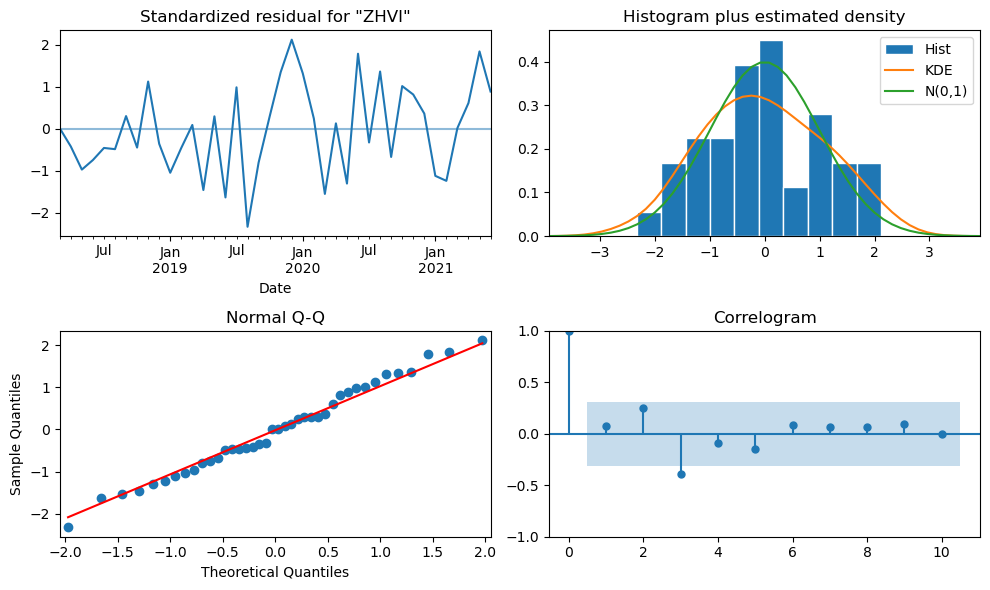

In [88]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

In [89]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax

In [90]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 7,485.996
- MSE = 73,082,085.061
- RMSE = 8,548.806
- R^2 = 0.822
- MAPE = 0.98%


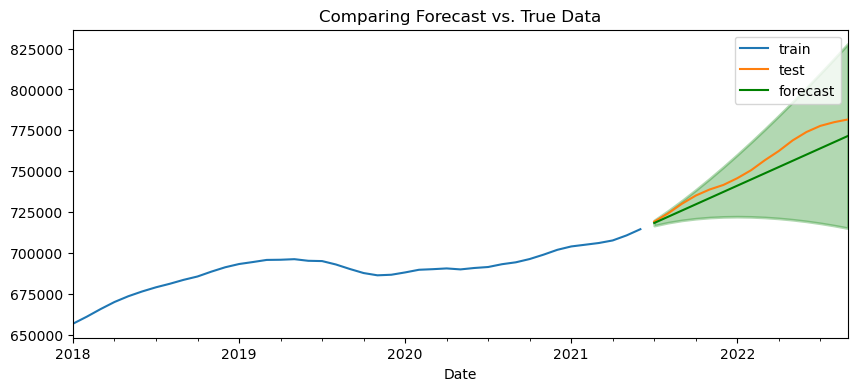

In [91]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [103]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  
    m=12,
    trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=768.433, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=733.235, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=872.953, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=734.033, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=751.534, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=735.153, Time=0.04 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=735.153, Time=0.02 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=737.153, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=740.880, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=734.901, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=745.401, Time=0.05 sec

Best model:  ARIMA(0,1,0)(0,0,0)[12] intercept
Total fit time: 0.732 seconds


In [98]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -364.617
Date:                Fri, 27 Oct 2023   AIC                            733.235
Time:                        16:35:24   BIC                            736.662
Sample:                    01-31-2018   HQIC                           734.483
                         - 06-30-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1409.9268    290.500      4.853      0.000     840.557    1979.297
sigma2      3.104e+06   7.44e+05      4.170      0.000    1.65e+06    4.56e+06
===================================================================================
Ljung-Box (L1) (Q):                  30.16   Jarque-Bera (JB):                 1.35
Prob(Q):                              0.00   Prob(JB):                         0.51
Heteroskedasticity (H):               0.45   Skew:                            -0.44
Prob(H) (two-sided):                  0.14   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

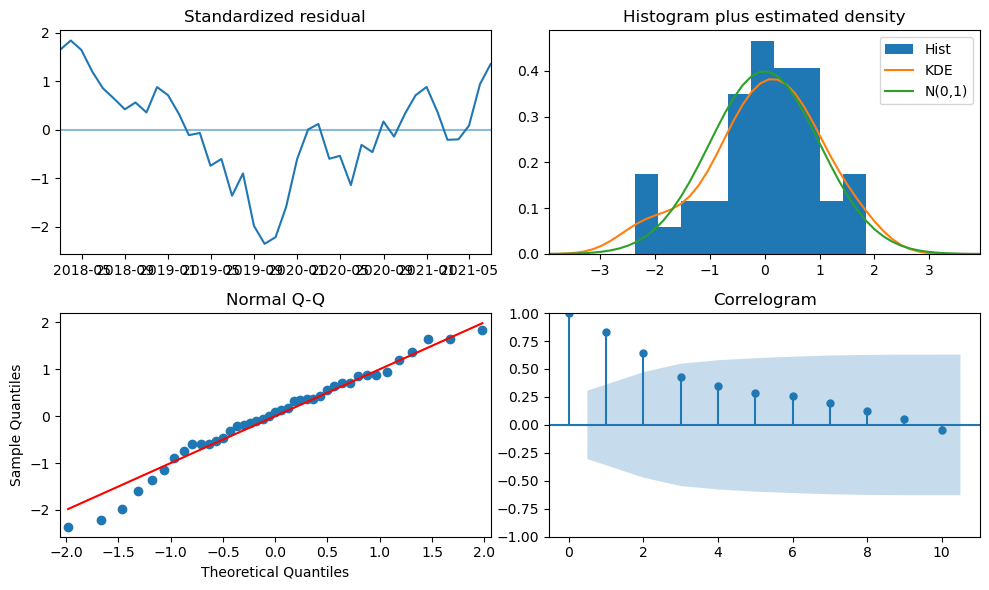

In [99]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 37,900.333
- MSE = 1,846,971,743.000
- RMSE = 42,976.409
- R^2 = -3.499
- MAPE = 4.97%


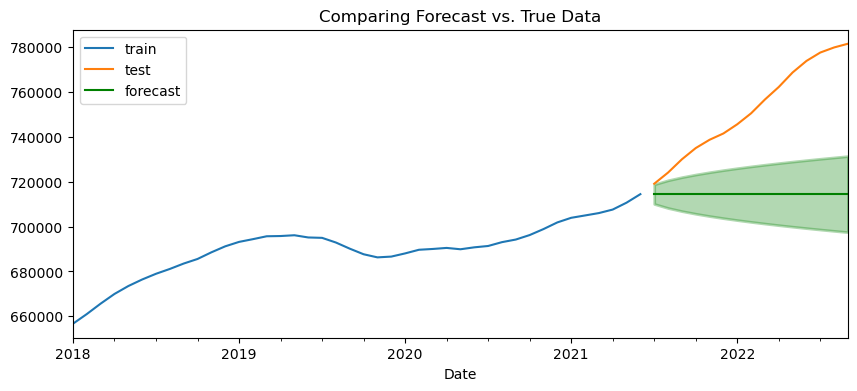

In [104]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(train, order=auto_model.order, seasonal_order=auto_model.seasonal_order).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

### surprisingly, the pmdarima's auto_arima gives us a worse prediction. We will fit a manual SARIMA model for future forecasts using the entire dataset

C:\Users\yupfj\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


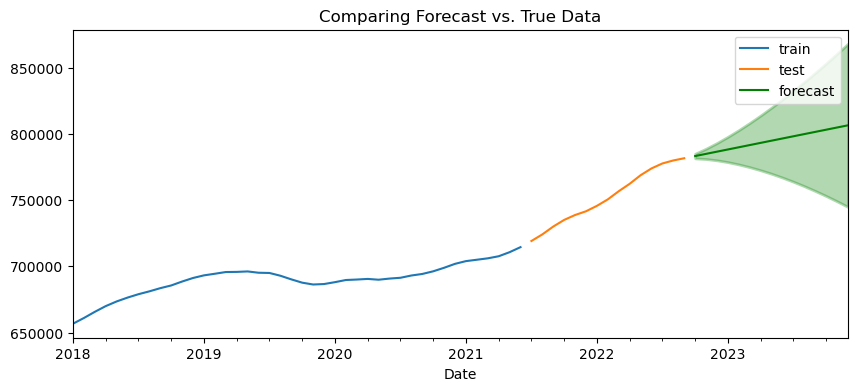

In [106]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 12 # Seasonal period

final_model = tsa.ARIMA(ts_NY, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

In [110]:
# calculate Raw values for change in the final month in the forecast vs. the first month.
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
change = final_value - starting_value
print(f'the value changes {change} from {starting_value}')

the value changes 23205.38624447328 from 783277.8408221165


In [108]:
# Convert the raw delta into a percent change.
perc_change = (change / starting_value) * 100
perc_change

2.962599608348075

In [ ]:
- What is the predicted home value in New York City 6 months into the future (beyond the dataset)?
 ``` the predicted final_value is around 806483 ```

- What is the percent change in home values in New York City by the end of the 6-month forecast (beyond the dataset)?
 ``` around 3% ```